Partie  1: Recuit simulé

Détermination des N points d'un plan d'expérience optimal pour le critère maximin

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Fonction qui calcule le critère
def calculer_critere(X):
    N = X.shape[0]
    phi = np.inf

    for i in range(N):
        for k in range(N):
            if k != i:
                distance = np.linalg.norm(X[k, :] - X[i, :])
                phi = min(phi, distance)

    return phi

#Essai avec les configuration suivante:
X1=np.array([[0 , 0], [0 , 1] , [1 , 1],[0.5 , 0.5], [1 , 0]])
X2=np.array([[0 , 0], [0 , 1] , [1 , 1]])



print(calculer_critere(X1))

0.7071067811865476


On remarque que pour des configurations initiales connus, on retrouve les bonnes valeurs de la distance minimale.

On teste pour différentes valeurs de N.

Pour N=3, on obtient le meilleur plan suivant:

[[0.         1.        ]
 [1.         0.78536779]
 [0.23582952 0.        ]]

 pour le plan initial suivant:
[[0.45195748 0.37836121]
 [0.50446251 0.34395727]
 [0.60529093 0.14544814]]

Les valeurs sont limités par les bords imposés.



On teste pour différentes valeurs de N.

Pour N=5, on obtient le meilleur plan suivant:
[[0.44157261 0.        ]
 [0.         0.52606642]
 [0.27816887 0.99708704]
 [1.         0.        ]
 [0.94694043 0.97928341]]

 pour le plan initial suivant:

 [[0.02520838 0.7616597 ]
 [0.66391711 0.86024599]
 [0.59425411 0.28317487]
 [0.64387155 0.06036192]
 [0.67717845 0.54570381]]


L'algorithme a l'air de bien marcher dans ce cas.





On essaie dans la suite de varier la méthode d'exploration en changeant l'echelle de perturbation et la fonction de perturbation ( par une perturbation aléatoire)



On remarque qu'avec le critère linéaire la valeur de phi atteint des maximum locaux pour plusieurs intervalles d'itérations ( ce qui veut dire que l'exploration du domaine est moins qualitative)


En terme de convergence,  la courbe de phi dépend de la configuration initiale et on a parfois l'impression d'atteindre un maximumm global, mais la différence entre les valeurs de phi_max pour les différentes stratégies de refroidissement ne confirment pas la convergence.

**Exercice 2 :**

Gradient stochastique:

In [ ]:
from math import *
from random import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.stats import expon,norm,uniform

#rng(31410) #initialisation du génératuer pour avoir les mêmes données.
np.random.seed(seed=31410)
nt = 100 #taille de l'échantillon total
T = 10 #Dimension de la variable explicative
d = 200
rsnr=30
Xt=norm.rvs(size=(nt,d))
Xt=Xt/(np.ones((nt,1))*(np.sum(Xt**2,axis=0))**(1/2))   #chaque observation $x_i$ est normalisé de norme 1.
# create signal
ind=np.random.permutation(d) # crée une permutation de taille d
indice=ind[0:T]  #récupère les T premiers indices de la permutation
weights=norm.rvs(size=(T,1))
for i in range (0,T):
    weights[i]=weights[i] + copysign(1,weights[i])
yt=Xt[0:nt,indice]@weights #le signal ne dépend que des variables dont les indices sont dans indice
stdnoise=np.std(yt)/rsnr
yt=yt+norm.rvs(loc =0, scale = stdnoise,size=(np.size(yt),1))


#création du fichier d'apprentissage


indapp=np.arange(0, floor(nt/2), 1)
nb_app =np.size(indapp) #taille de l'échantillon d'apprentissage
X=Xt[indapp,0:d]
y=yt[indapp]
n=np.size(indapp)

#création du fichier de validation


indval=np.arange(floor(nt/2),nt,1)
Xv=Xt[indval,0:d]
yv=yt[indval]

<ipython-input-1-8dd01472d91e>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[i]=weights[i] + copysign(1,weights[i])


In [ ]:
# fonction qui calcule le cout

def compute_gradient(X, y, w, lambda_reg):

    gradient = - X.T @ (y - X @ w) + lambda_reg * w
    return gradient

def stochastic_gradient_descent(X, y, lambda_reg, alpha, num_iterations):
    n, d = X.shape
    w = np.zeros((d, 1))  # Initialisation des poids à zéro
    learning_rate=1
    for k in range(num_iterations):
        shuffled_indices = np.random.permutation(n)
        for i in shuffled_indices:
            xi = X[i:i+1,:]
            yi = y[i:i+1]
            gradient = compute_gradient(xi, yi, w, lambda_reg)
            w = w - learning_rate * gradient
        # actualisation de learening rate pour chaque iteration
        learning_rate = 1 / (k + 1) ** alpha

    return w

# tester la méthode stochastic_gradient_descent
lambda_reg = 10
num_iterations = 1000
alpha = 0.6
w_hat = stochastic_gradient_descent(X, y, lambda_reg, alpha, num_iterations)
loss_training = np.linalg.norm(y - X @ w_hat)**2 / 2
mean_loss_training = np.linalg.norm(y - X @ w_hat)**2 / (2 * len(y))
print(f"l'erreur sur l'apprentissage: {loss_training}")
print(f"l'erreur moyenne sur l'apprentissage: {mean_loss_training}")

l'erreur sur l'apprentissage: 7.374655711927516
l'erreur moyenne sur l'apprentissage: 0.14749311423855033


La séquence choisie pour le critère est la suivante:
$\epsilon_{k}=1/k^\alpha$ avec $\alpha=0.65$.

Pour 50 itérations on obtient les valeurs suivantes:

l'erreur sur l'apprentissage: 7.426654843984631
l'erreur moyenne sur l'apprentissage: 0.14853309687969263

Pour 100 itérations on obtient:
l'erreur sur l'apprentissage: 7.3518007170270945
l'erreur moyenne sur l'apprentissage: 0.1470360143405419

Cette valeur change peu en augmentant plus le nombre des itérations.

In [ ]:
# tester la méthode stochastic_gradient_descent
lambda_reg = 10
num_iterations = 1000
alpha = 0.6
w_hat = stochastic_gradient_descent(X, y, lambda_reg, alpha, num_iterations)


# Calculate the loss on the validation set
loss_training = np.linalg.norm(y - X @ w_hat)**2
loss_validation = np.linalg.norm(yv - Xv @ w_hat)**2

# Calculate the mean loss on the validation set
mean_loss_training = np.linalg.norm(y - X @ w_hat)**2 / (2 * len(y))
mean_loss_validation = np.linalg.norm(yv - Xv @ w_hat)**2 / (2 * len(yv))

print(f"l'erreur sur l'apprentissage: {loss_training}")
print(f"l'erreur sur la validation: {loss_validation}")
print(f"l'erreur moyenne sur l'apprentissage: {mean_loss_training}")
print(f"l'erreur moyenne sur la validation: {mean_loss_validation}")

l'erreur sur l'apprentissage: 14.776055031034826
l'erreur sur la validation: 26.786914524304624
l'erreur moyenne sur l'apprentissage: 0.14776055031034827
l'erreur moyenne sur la validation: 0.2678691452430462


La valeur de l'erreur obtenue pour l'ensemble de validation est plus grande que celle de l'apprentissage.
Lorsque la valeur de ce critère sur de validation est plus grande que celle sur le fichier d'apprentissage, cela suggère que le modèle a une meilleure performance sur les données d'apprentissage que sur les données de validation. Plusieurs raisons peuvent expliquer cela :
* Le modèle peut être trop complexe et s'ajuster trop précisément aux données d'apprentissage, capturant ainsi le bruit dans les données.
* Les hyperparamètres ou des caractéristiques du modèle ont été ajustés en fonction des données d'apprentissage, cela peut conduire à une performance moindre sur les données de validation si le modèle est trop spécifique aux données d'apprentissage.



Question 3: Variation de lambda

 On compare les performances du modèle pour différentes valeurs de λ et on trace des courbes ou des graphiques pour visualiser la relation entre λ et les performances du modèle.

Lambda = 0.001, Loss = 0.00014906846911111102
Lambda = 0.01, Loss = 0.0079413034450632
Lambda = 0.1, Loss = 0.07487403648814422
Lambda = 1, Loss = 0.13622287118455753
Lambda = 10, Loss = 0.1471480062574791
Lambda = 11, Loss = 0.1475153407736915


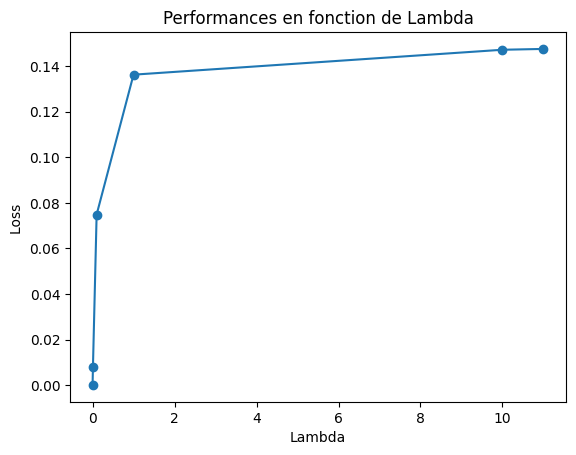

In [ ]:
alpha = 0.65
max_iter = 1000
# Liste des valeurs de lambda à tester
lambda_values = [0.001, 0.01, 0.1, 1, 10 , 11 ]
results = {}

# Boucle sur les valeurs de lambda
for lam in lambda_values:

    w_hat = stochastic_gradient_descent(X, y, lam, alpha, max_iter)


    loss = np.linalg.norm(y - X @ w_hat)**2 / (2 * len(y))


    results[lam] = {'w_hat': w_hat, 'loss': loss}


for lam, result in results.items():
    print(f"Lambda = {lam}, Loss = {result['loss']}")


plt.plot(lambda_values, [result['loss'] for result in results.values()], marker='o')
plt.xlabel('Lambda')
plt.ylabel('Loss ')
plt.title('Performances en fonction de Lambda')
plt.show()

On trouve que a partir de la valeur 10 si on change lambda l'erreur reste la meme du coup on choisit la valeur minimal de lambda qui ne fait pas varier largement l'erreur.

Question 4:

Taille apprentissage: 10, Loss Validation: 0.20883863569718258
Taille apprentissage: 20, Loss Validation: 0.22649222981461142
Taille apprentissage: 30, Loss Validation: 0.21110367944029368
Taille apprentissage: 40, Loss Validation: 0.2337916356064827
Taille apprentissage: 50, Loss Validation: 0.2676963900735429


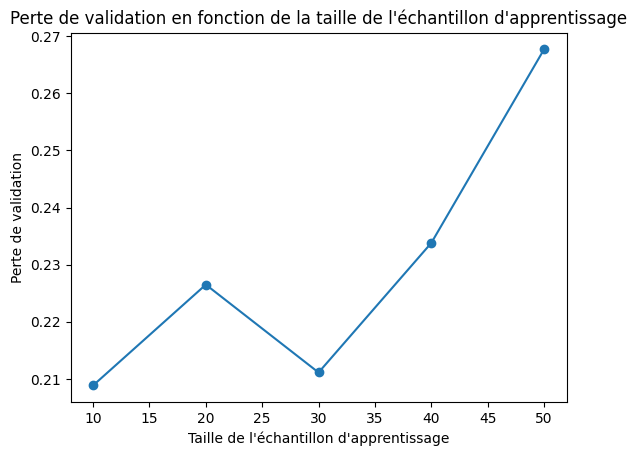

In [ ]:
# Variation de la taille de l'échantillon d'apprentissage
sizes_apprentissage = np.arange(10, 60, 10)
losses_validation = []

for size_app in sizes_apprentissage:
    indapp = np.arange(0, size_app, 1)
    X = Xt[indapp, 0:d]
    y = yt[indapp]
    n = np.size(indapp)

    indval = np.arange(size_app, nt, 1)
    Xv = Xt[indval, 0:d]
    yv = yt[indval]

    w_hat = stochastic_gradient_descent(X, y, lambda_reg, alpha, num_iterations)

    # tester le performance de l'algorithme
    loss_val = np.linalg.norm(yv - Xv @ w_hat)**2 / (2 * len(yv))
    losses_validation.append(loss_val)

    print(f"Taille apprentissage: {size_app}, Loss Validation: {loss_val}")

plt.plot(sizes_apprentissage, losses_validation, marker='o')
plt.xlabel('Taille de l\'échantillon d\'apprentissage')
plt.ylabel('Perte de validation')
plt.title('Perte de validation en fonction de la taille de l\'échantillon d\'apprentissage')
plt.show()

La valeur de la taille de l'échantillon d'apprentissage qui minimse la perte sur l'ensemble de validation est N=30.